# Prewhitening in Python
A notebook on how to prewhiten your data in Python. 

Implementation as described in:

Representational fMRI analysis: an introductory tutorial. Alexander Walther, Naveed Ejaz, Nikolaus Kriegeskorte, Jörn Diedrichsen. [Link](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.721.4570&rep=rep1&type=pdf).

In [9]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt
%matplotlib inline

Let's generate some correlated data:

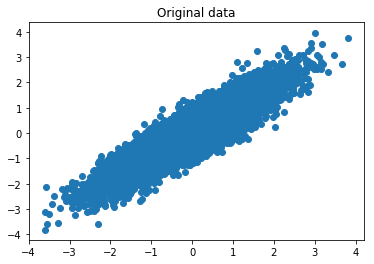

In [12]:
C = np.array([[1, .9], [.9, 1]])
x = np.random.multivariate_normal([0, 0], C, 10000)

plt.scatter(x[:, 0], x[:, 1])
plt.title('Original data')
plt.show()

Now, let's prewhiten the data as follows:

\begin{align}
X_{prewhitened} = (X'X)^{-1/2}X
\end{align}

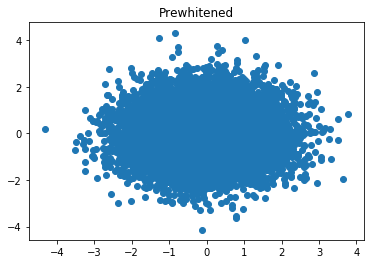

In [14]:
D = sqrtm(np.linalg.inv(np.cov(x.T)))  # D = prewhitening matrix
xw = D.dot(x.T).T
plt.title('Prewhitened')
plt.scatter(xw[:, 0], xw[:, 1])
plt.show()

Now, the covariance-matrix of X should (approximately) be the identity-matrix ($I$):

In [16]:
np.cov(xw.T)

array([[  1.00000000e+00,   2.53914523e-15],
       [  2.53914523e-15,   1.00000000e+00]])